In [4]:
%matplotlib inline


# Build image pyramids


The ``pyramid_gaussian`` function takes an image and yields successive images
shrunk by a constant scale factor. Image pyramids are often used, e.g., to
implement algorithms for denoising, texture discrimination, and scale-invariant
detection.




In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian

In [6]:
# Load image and get its dimensions
image = data.astronaut()
rows, cols, dim = image.shape
(rows, cols, dim)

(512, 512, 3)

In [7]:
# Get Image Pyramid (Gaussian)
pyramid = tuple(pyramid_gaussian(image, downscale=2)) # You can set "max_layer" too
len(pyramid)

10

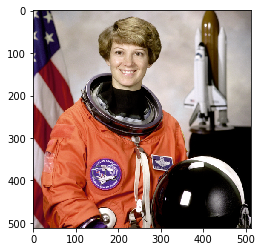

In [8]:
plt.imshow(pyramid[0])

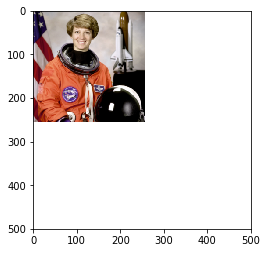

In [9]:
plt.xlim(right=500)
plt.ylim(bottom = 500)
plt.imshow(pyramid[1])

<Figure size 1440x720 with 0 Axes>

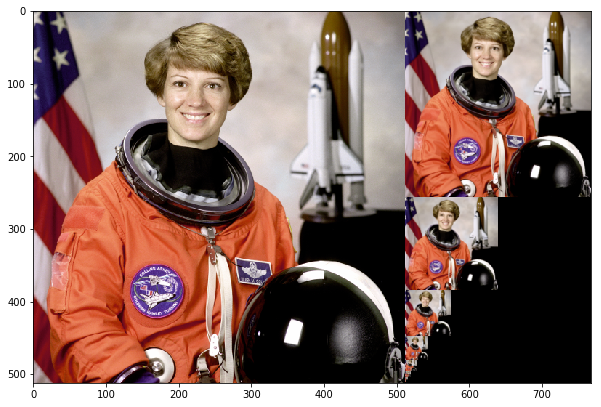

In [10]:
# Plot Image Pyramid

plt.rcParams['figure.figsize'] = (10.0, 8.0)

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

plt.figure(figsize=(20,10))
i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()

==============================
Rescale, resize, and downscale
==============================

`Rescale` operation resizes an image by a given scaling factor. The scaling
factor can either be a single floating point value, or multiple values - one
along each axis.

`Resize` serves the same purpose, but allows to specify an output image shape
instead of a scaling factor.

Note that when down-sampling an image, `resize` and `rescale` should perform
Gaussian smoothing to avoid aliasing artifacts. See the `anti_aliasing` and
`anti_aliasing_sigma` arguments to these functions.

`Downscale` serves the purpose of down-sampling an n-dimensional image by
integer factors using the local mean on the elements of each block of the size
factors given as a parameter to the function.



In [11]:
# Imports
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [12]:
# Get image and convert to gray scale
image = color.rgb2gray(data.astronaut())

In [13]:
# Three ways of resizing
image_rescaled = rescale(image, 1.0 / 4.0)
image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4))
image_downscaled = downscale_local_mean(image, (4, 3))

/Users/sayyed/anaconda/envs/faster-rcnn/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


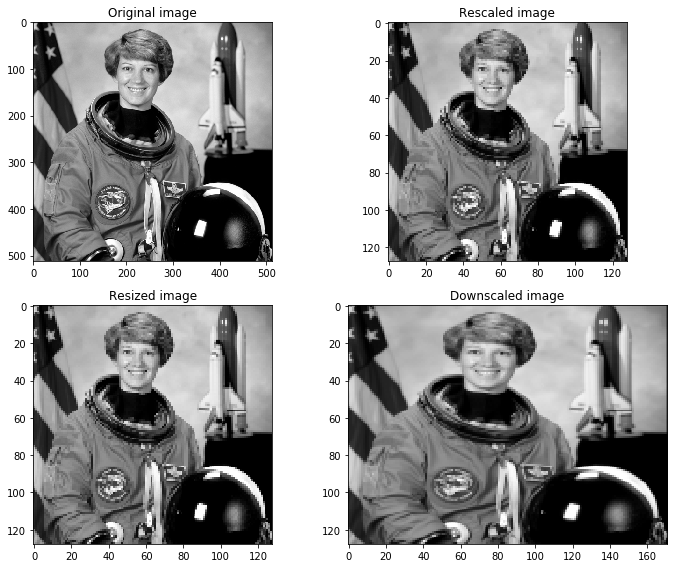

In [14]:
# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()